# **Manipulating Financial Data in Python** 
***

**Note: If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".**

---

**Run the cell below to import some packages.  If you get an `import error` for a package you've already installed, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt.

#### Import Packages

In [2]:
#importing some useful packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

### Reading and Plotting Stock Data

Read GOOG stock data into a pandas dataframe

In [3]:
dataframe_goog = pd.read_csv('data/GOOG.csv')   

Print 5 last rows of the GOOG dataframe

In [4]:
 print(dataframe_goog.tail())

            Date        Open        High         Low       Close   Adj Close  \
3117  2017-05-22  935.000000  941.882996  935.000000  941.859985  941.859985   
3118  2017-05-23  947.919983  951.466980  942.575012  948.820007  948.820007   
3119  2017-05-24  952.979980  955.090027  949.500000  954.960022  954.960022   
3120  2017-05-25  957.330017  972.629028  955.469971  969.539978  969.539978   
3121  2017-05-26  969.700012  974.979980  965.030029  971.469971  971.469971   

       Volume  
3117  1120400  
3118  1270800  
3119  1024800  
3120  1660500  
3121  1249600  


Print 'Adj Close' values of GOOG dataframe rows between index 10 and 20

In [5]:
 print(dataframe_goog['Adj Close'][10:21])

10    101.569290
11     98.281616
12     96.597931
13     93.788460
14     90.022575
15     88.229294
16     94.266663
17     93.688828
18     94.814613
19     97.444756
20     95.591698
Name: Adj Close, dtype: float64


Plot last 100 values of 'High' and 'Low' from the GOOG dataframe

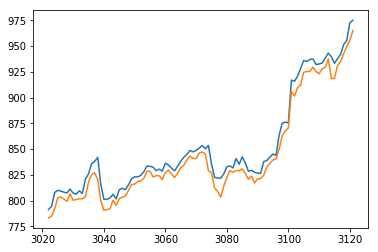

In [6]:
plt.plot(dataframe_goog[['High', 'Low']].tail(100))

Create dataframe of Stock Prices for multiple stocks

In [7]:
# Read first stock data into dataframe
df1 = pd.read_csv('data/AMZN.csv', index_col='Date', parse_dates=True,
                         usecols=['Date','Adj Close'], na_values=['nan'])   

# Rename 'Adj Close' column to 'AMZN' to prevent clash
df1 = df1.rename(columns={'Adj Close': 'AMZN'})

# Read in more stocks
stocks = ['GOOG','AAPL','IBM', 'SPY']
for stock in stocks:
        df_temp = pd.read_csv('data/{}.csv'.format(stock), index_col='Date', parse_dates=True,
                         usecols=['Date','Adj Close'], na_values=['nan'])
        # Rename to prevent clash
        df_temp = df_temp.rename(columns={'Adj Close': stock})
        df1=df1.join(df_temp) #use default how ='left'

Visualize data from dataframe

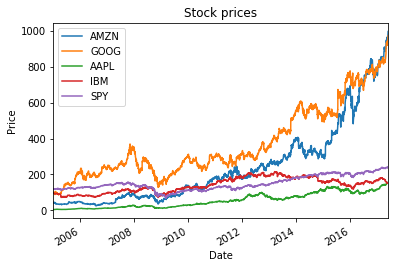

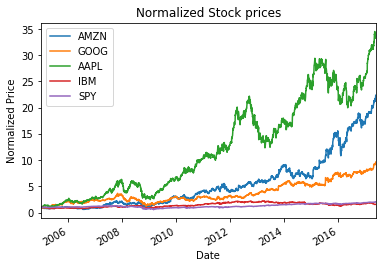

In [8]:
# Plot raw data from dataframe
ax = df1.plot(title='Stock prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

# Plot normalized data from dataframe
df1_norm = df1 / df1.ix[0,:]
ax = df1_norm.plot(title='Normalized Stock prices')
ax.set_xlabel('Date')
ax.set_ylabel('Normalized Price')

### Computing Statistics

In [9]:
print('Mean of Normalized Stock Prices')
print(df1_norm.mean())

print('\nMedian of Normalized Stock Prices')
print(df1_norm.median())

print('\nNormalized Stock Prices Standard Deviation')
print(df1_norm.std())

Mean of Normalized Stock Prices
AMZN     5.460785
GOOG     3.688789
AAPL    12.262362
IBM      1.436631
SPY      1.249130
dtype: float64

Median of Normalized Stock Prices
AMZN     4.029200
GOOG     2.907775
AAPL    10.703903
IBM      1.448235
SPY      1.149252
dtype: float64

Normalized Stock Prices Standard Deviation
AMZN    5.116538
GOOG    1.992073
AAPL    9.044647
IBM     0.415005
SPY     0.330160
dtype: float64


### Bollinger Bands

C:\Users\Vincent\Miniconda3\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  
C:\Users\Vincent\Miniconda3\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).std()
  if __name__ == '__main__':


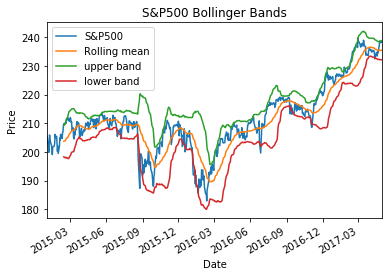

In [10]:
# Define date range
start_date = '2015-01-01'
end_date = '2017-05-01'

# Compute rolling mean
rm = pd.rolling_mean(df1.ix[start_date:end_date, 'SPY'], window=30)

# Compute rolling standard deviation
rstd = pd.rolling_std(df1.ix[start_date:end_date, 'SPY'], window=30)

# Compute upper and lower bands
upper_band = rm + 2*rstd
lower_band = rm - 2*rstd

# Plot raw SPY values, rolling mean and Bollinger Bands
ax = df1.ix[start_date:end_date, 'SPY'].plot(title='S&P500 Bollinger Bands', label='S&P500')
rm.plot(label='Rolling mean', ax=ax)
upper_band.plot(label='upper band', ax=ax)
lower_band.plot(label='lower band', ax=ax)

# Add axis labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')
plt.show()

### Daily Returns

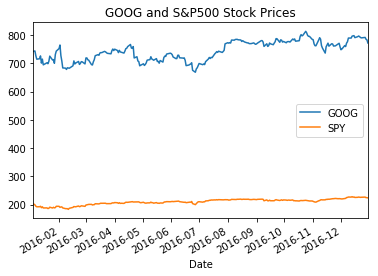

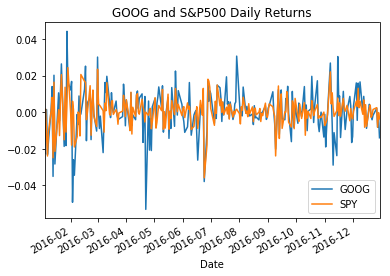

In [11]:
# Define date range
start_date = '2016-01-01'
end_date = '2017-01-01'

# Define stocks to compare
compare_stocks = ['GOOG','SPY']

# Copy given dataframe to match size and column names
daily_returns = df1.copy()

# compute daily returns for row 1 onwards
# daily_returns[1:] = (df1[1:] / df1[:-1].values) - 1
daily_returns = (df1 / df1.shift(1)) - 1

# set daily returns for row 0 to 0
daily_returns.ix[0,:] = 0

# Plot stock price data
df1.ix[start_date:end_date, compare_stocks].plot(title='GOOG and S&P500 Stock Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')

# Plot daily returns data
daily_returns.ix[start_date:end_date, compare_stocks].plot(title='GOOG and S&P500 Daily Returns')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Return')

#### Histograms of Daily Returns

S&P500 mean = 0.03996 %
S&P500 std = 0.82738 %
S&P500 kurtosis = 2.21278403369


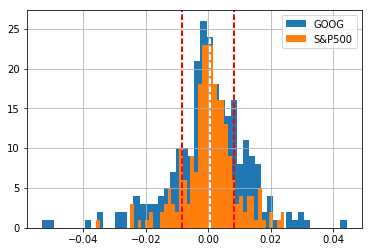

In [12]:
daily_returns = daily_returns.ix[start_date:end_date, compare_stocks]

# Get statistics of Daily Returns of SPY
mean_spy = daily_returns['SPY'].mean()
print('S&P500 mean =', round(mean_spy*100, 5), '%')
std_spy = daily_returns['SPY'].std()
print('S&P500 std =', round(std_spy*100, 5), '%')
kurtosis_spy = daily_returns['SPY'].kurtosis() # positive -> fat tails; negative -> skinny tails
print('S&P500 kurtosis =', kurtosis_spy)

# Plot histogram of daily returns with mean and std
daily_returns['GOOG'].hist(bins=50, label='GOOG')
daily_returns['SPY'].hist(bins=50, label='S&P500')
plt.axvline(mean_spy,color='w',linestyle='dashed',linewidth=2)
plt.axvline(std_spy,color='r',linestyle='dashed',linewidth=2)
plt.axvline(-std_spy,color='r',linestyle='dashed',linewidth=2)
plt.legend(loc='upper right')
plt.show()

#### Scatterplots of Daily Returns
Beta is a measure of the volatility, or systematic risk, of a security or a portfolio in comparison to the market as a whole.

Read more: Beta http://www.investopedia.com/terms/b/beta.asp#ixzz4kxanILK5 

Alpha, often considered the active return on an investment, gauges the performance of an investment against a market index used as a benchmark.

Read more: Alpha http://www.investopedia.com/terms/a/alpha.asp#ixzz4kxaWOepd 

GOOG alpha = -0.000234447448583
GOOG beta = 0.953128816681


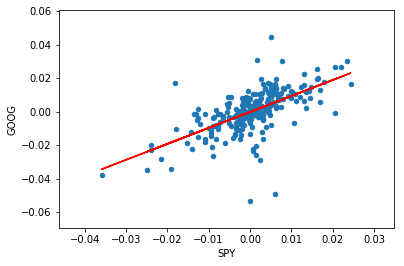

In [13]:
daily_returns.plot(kind='scatter', x='SPY', y='GOOG')

# Fit a line to get Alpha and Beta of GOOG
beta_goog, alpha_goog = np.polyfit(daily_returns['SPY'], daily_returns['GOOG'], 1)
print('GOOG alpha =', alpha_goog)
print('GOOG beta =', beta_goog)
plt.plot(daily_returns['SPY'], alpha_goog + beta_goog*daily_returns['SPY'], '-', color='r')
plt.show()

Calculate the correlation coefficient between the stock and the market

In [14]:
print(daily_returns.corr(method='pearson'))

          GOOG       SPY
GOOG  1.000000  0.626634
SPY   0.626634  1.000000


### Cumulative Returns

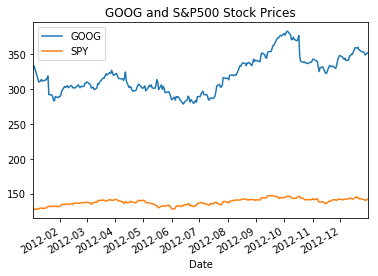

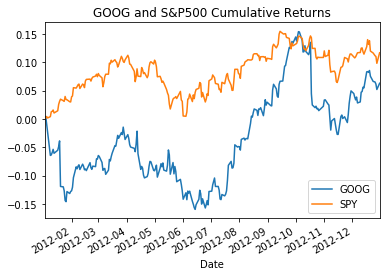

In [15]:
# Define date range
start_date = '2012-01-01'
end_date = '2013-01-01'

# Define stocks to compare
compare_stocks = ['GOOG','SPY']

# Get data slice
df_slice = df1.ix[start_date:end_date, compare_stocks]

# compute cumulative returns
cumulative_returns = (df_slice / df_slice.ix[0]) - 1

# Plot stock price data
df_slice.plot(title='GOOG and S&P500 Stock Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')

# Plot cumulative returns data
cumulative_returns.ix[start_date:end_date, compare_stocks].plot(title='GOOG and S&P500 Cumulative Returns')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')